In [123]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

# Анализ исходных данных

In [65]:
y = np.array([1440075, 5146, 13612, 964, 19513178, 28973, -780599, 2598165, 628091, 29204, 1945560, 366170, -20493, 381558, 1225908, 3293989, 416616, -564258, 221194, 701035, 62200, 123440, 55528, 422070, -468, 225452, -61237, -540, 40588, 53182, -210, 63058, 1197196, 221177, 1548768, -33030, -34929, 115847, 35198, 788567, 309053, 8552, 173079, 1227017, 701728, 17927, 2557698, 0, 5406, 40997, 1580624, 9990896, 6649, 22868])
x1 = np.array([61749, 17532, 20268, 211, 52034182, 602229, 311268, 464651, 214411, 12039, 9670, 287992, 1105293, 27265, 431231, 37315847, 2122138, 1395080, 13429, 75554, 22195, 12350, 14686, 52443, 239255, 1292, 924951, 0, 1638, 54758, 8, 235731, 2232742, 4682, 84262, 106, 103567, 275386, 20624, 33879, 99670, 257, 6120, 33757, 381050, 53260, 4537040, 194091, 1185, 101706, 9285230, 1645470, 82229, 3])
x2 = np.array([1007355, 58110, 51271, 5827, 2411352, 74839, 15737048, 4381403, 3728587, 738811, 716648, 239076, 8855, 265569, 1525379, 8556455, 258120, 7958766, 105123, 497028, 1659245, 84026, 137348, 662299, 29880, 87112, 299733, 46139, 22683, 1909328, 16191, 563481, 1083829, 40664, 413994, 52575, 1769300, 432312, 169155, 647914, 211624, 99815, 114223, 1930517, 335238, 101834, 21786237, 64889, 27941, 39653, 1476613, 5066776, 1486511, 76455])
x3 = np.array([4920199, 50798, 18903, 13398, 63269757, 367880, 3933712, 5910831, 5325806, 705877, 2964277, 624661, 46728, 582581, 3463511, 5891049, 299286, 801276, 257633, 1566040, 528912, 167297, 52042, 188662, 130350, 585017, 344398, 36641, 215106, 998875, 1702, 807686, 1567998, 128256, 7720298, 14412, 921832, 233340, 361672, 458233, 619452, 119434, 257140, 4215454, 324968, 81960, 35232071, 76430, 21132, 79930, 1553508, 26312477, 972138, 132783])
x4 = np.array([5165712, 19595, 81072, 8446, 47002385, 1545052, 740437, 11925177, 2580485, 269908, 229855, 349643, 934881, 697664, 2231651, 23170344, 3509537, 1290245, 607249, 4616250, 991114, 438262, 75442, 1269731, 10870, 227132, 110970, 21278, 139209, 113113, 12685, 873886, 2307478, 331954, 1138707, 16705, 393717, 517290, 484228, 402613, 18776, 12381, 176126, 2063285, 59353, 84818, 3841845, 33112, 38560, 178604, 6546853, 2329554, 78526, 9067])
x5 = np.array([3490541, 23014, 8678, 4821, 23780450, 204181, 1456438, 5566412, 4285041, 624393, 2918345, 484537, 9865, 196045, 1095263, 2477424, 48174, 286058, 72854, 1304084, 294575, 44889, 24275, 140535, 114444, 272147, 76561, 25017, 18072, 496994, 602, 474612, 1040387, 55155, 7613662, 5038, 61353, 122062, 168314, 317153, 212882, 63550, 147549, 171162, 237083, 73343, 33477251, 15161, 7540, 58762, 259519, 7271400, 444251, 28536])
x6 = np.array([31365, 0, 84, 0, 1696853, 19474, 176, 127937, 73823, 130, 39667, 5733, 3319, 5763, 430844, 38133, 28393, 236642, 4548, 8773, 0, 24866, 3949, 8212, 940, 0, 11218, 127, 7569, 0, 46, 0, 25862, 1260, 14716, 0, 833099, 6824, 3227, 14021, 1909, 2558, 16197, 63810, 3886, 963, 26578, 7, 6465, 1035, 13516, 391744, 24001, 0])

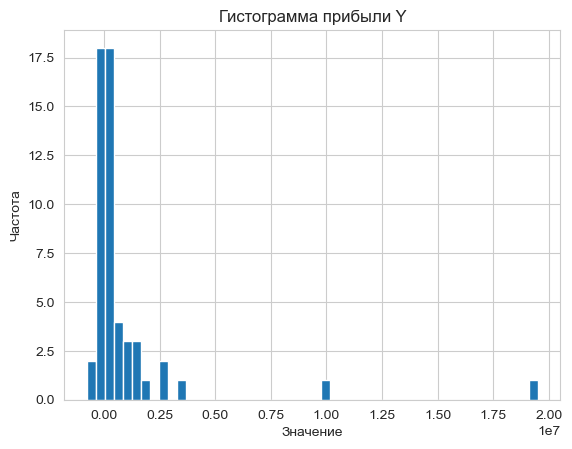

In [66]:
plt.hist(y, bins = 50)
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограмма прибыли Y')
plt.show()

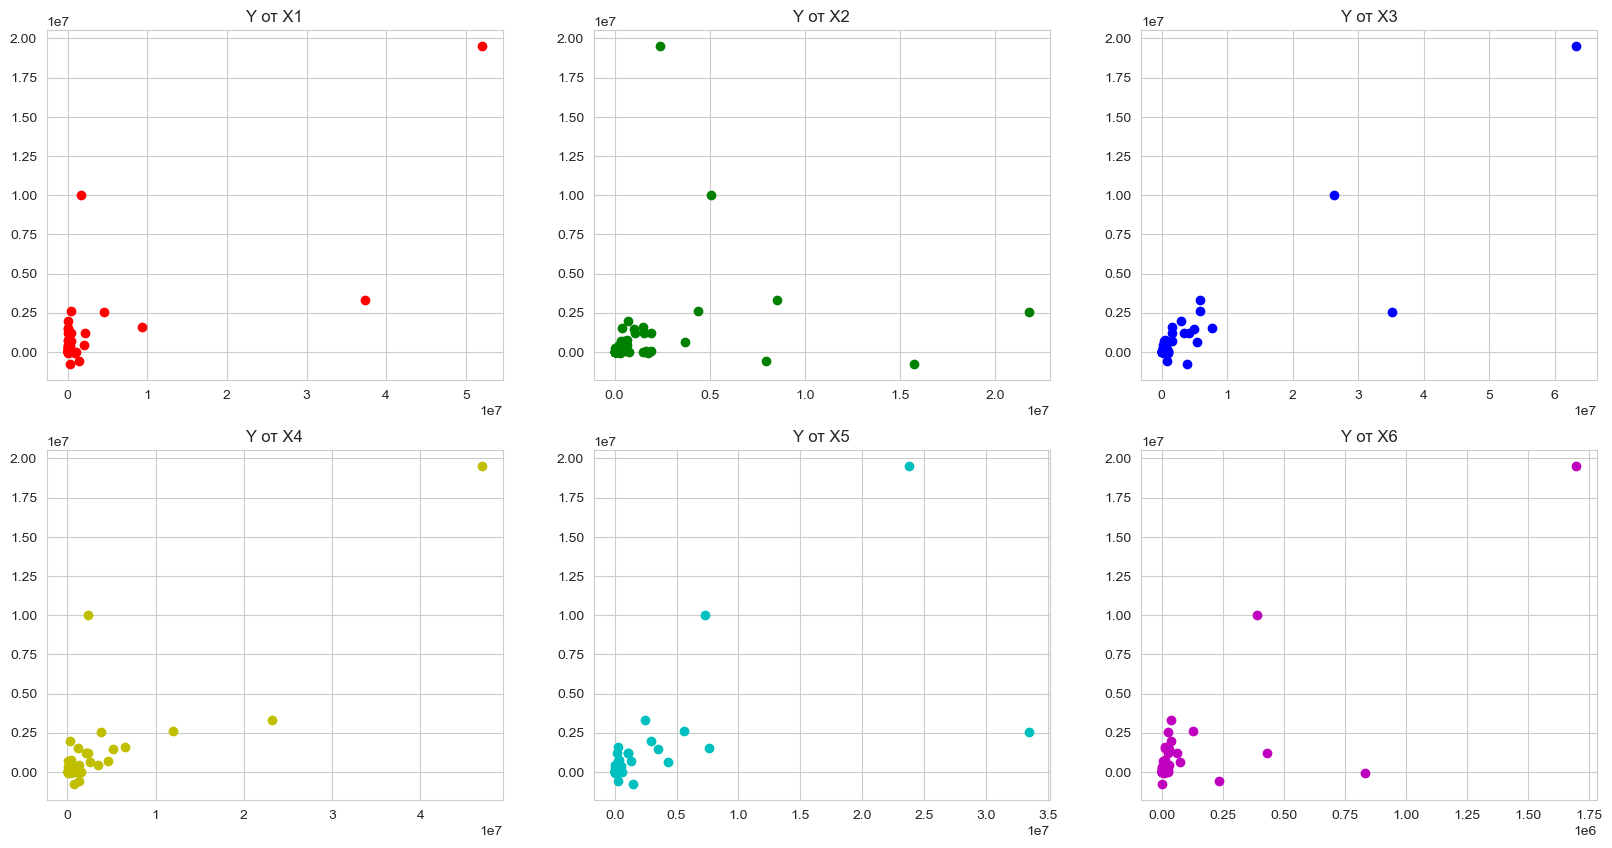

In [69]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.scatter(x1, y, color='r')
plt.title('Y от X1')

plt.subplot(2, 3, 2)
plt.scatter(x2, y, color='g')
plt.title('Y от X2')

plt.subplot(2, 3, 3)
plt.scatter(x3, y, color='b')
plt.title('Y от X3')

plt.subplot(2, 3, 4)
plt.scatter(x4, y, color='y')
plt.title('Y от X4')

plt.subplot(2, 3, 5)
plt.scatter(x5, y, color='c')
plt.title('Y от X5')

plt.subplot(2, 3, 6)
plt.scatter(x6, y, color='m')
plt.title('Y от X6')

plt.show()

# Работа с выбросами

In [70]:
# Вычисляем первый и третий квартили
def IQR(a):
    q1, q3 = np.percentile(a, [25, 75])

    # Вычисляем межквартильный диапазон
    iqr = q3 - q1

    # Определяем нижнюю и верхнюю границы выбросов
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    # Заменяем выбросы на медиану
    median = np.median(a)
    a[a < lower_bound] = median
    a[a > upper_bound] = median

In [71]:
IQR(y)
IQR(x1)
IQR(x2)
IQR(x3)
IQR(x4)
IQR(x5)
IQR(x6)

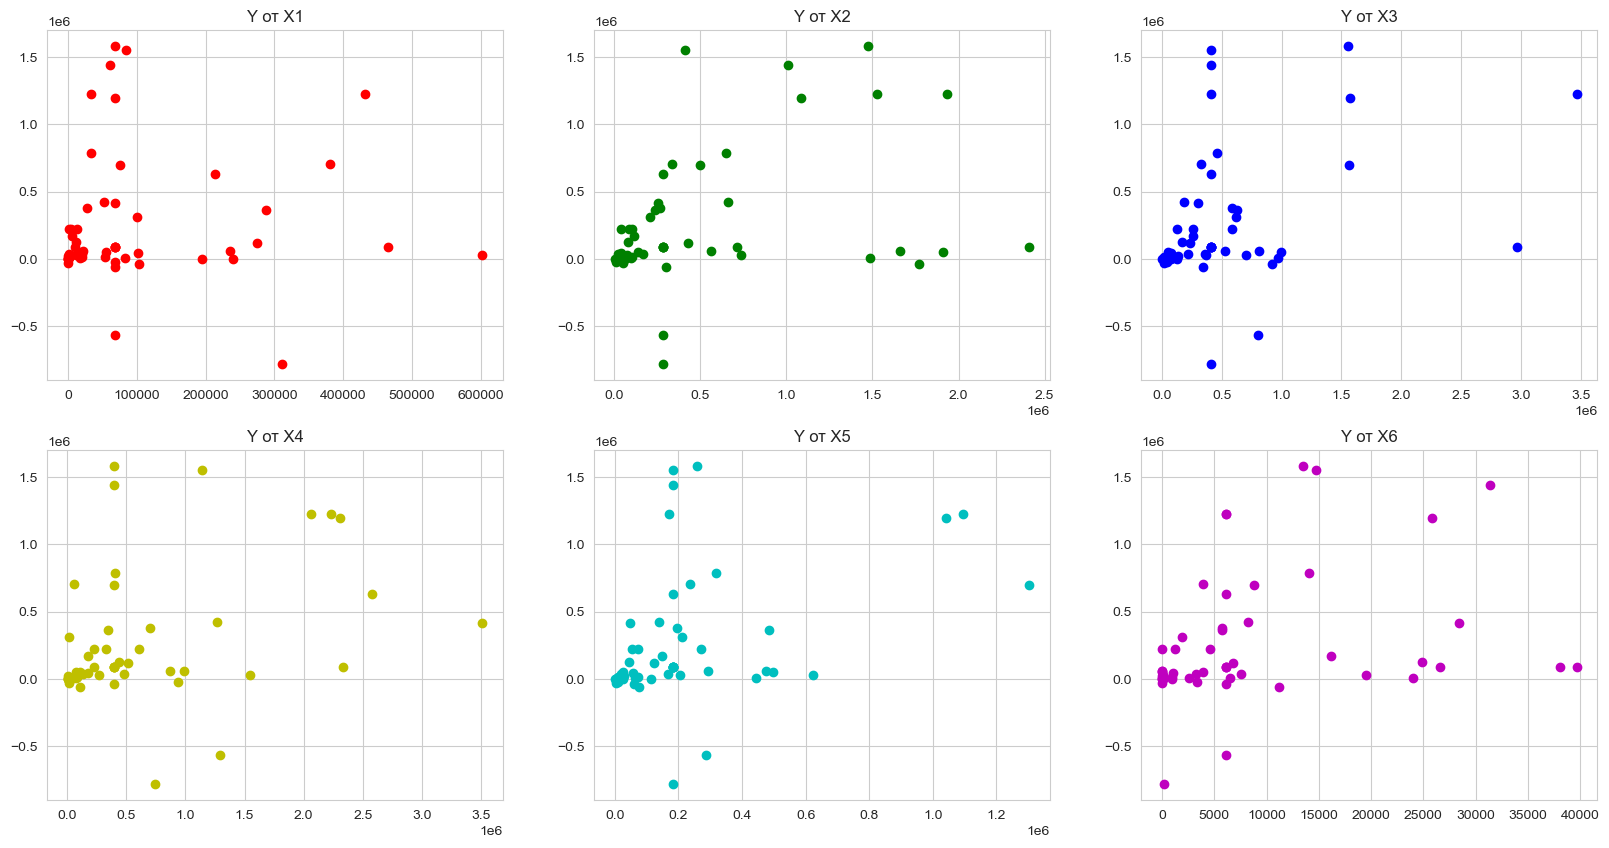

In [72]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.scatter(x1, y, color='r')
plt.title('Y от X1')

plt.subplot(2, 3, 2)
plt.scatter(x2, y, color='g')
plt.title('Y от X2')

plt.subplot(2, 3, 3)
plt.scatter(x3, y, color='b')
plt.title('Y от X3')

plt.subplot(2, 3, 4)
plt.scatter(x4, y, color='y')
plt.title('Y от X4')

plt.subplot(2, 3, 5)
plt.scatter(x5, y, color='c')
plt.title('Y от X5')

plt.subplot(2, 3, 6)
plt.scatter(x6, y, color='m')
plt.title('Y от X6')

plt.show()

# Построение корреляционной матрицы

<AxesSubplot:>

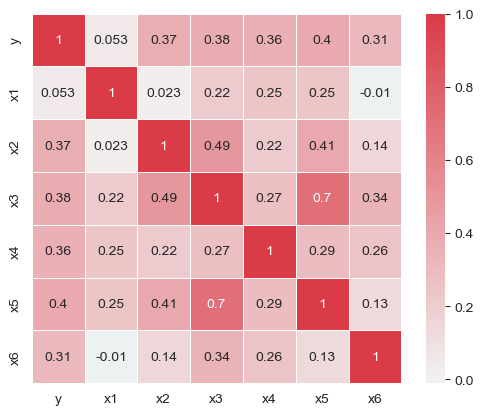

In [81]:
data = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5, 'x6': x6})
corr = data.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, center=0, annot=True, square=True, linewidths=.5)

# Проверка значимости коэффициентов корреляции

In [83]:
r_corr = data['y'].corr(data['x1'])
r_corr

0.05275459809363326

In [87]:
for i in range(1, 7):
    r_corr = data['y'].corr(data[f'x{i}'])
    print(f'Коэффициент корреляции y и x{i}: {round(r_corr, 3)}')
    t_stat = r_corr * np.sqrt(len(y) - 2) / np.sqrt(1 - r_corr ** 2)
    print('t-расчетное:', round(t_stat, 3))
    print('t-табличное: 2.007')
    print('\n')

Коэффициент корреляции y и x1: 0.053
t-расчетное: 0.381
t-табличное: 2.007


Коэффициент корреляции y и x2: 0.374
t-расчетное: 2.905
t-табличное: 2.007


Коэффициент корреляции y и x3: 0.378
t-расчетное: 2.946
t-табличное: 2.007


Коэффициент корреляции y и x4: 0.357
t-расчетное: 2.758
t-табличное: 2.007


Коэффициент корреляции y и x5: 0.399
t-расчетное: 3.142
t-табличное: 2.007


Коэффициент корреляции y и x6: 0.312
t-расчетное: 2.364
t-табличное: 2.007




# Построение модели множественной линейной регрессии

In [89]:
X = np.array([np.ones(len(y)), x1, x2, x3, x4, x5, x6]).T
B = np.linalg.inv(X.T @ X) @ X.T @ y
B

array([-5.05787505e+04, -2.19264949e-01,  1.60743854e-01, -1.10566375e-02,
        1.25543549e-01,  4.52544249e-01,  9.17313227e+00])

In [122]:
X = np.array([np.ones(len(y)), x1, x2, x3, x4, x5, x6]).T

model = sm.OLS(endog=y, exog=X).fit()

coefficients = model.params
t_values = model.tvalues
for i in range(len(t_values)):
    print(f't-критерий b{i} = {round(t_values[i],3)}')

t-критерий b0 = -0.523
t-критерий b1 = -0.475
t-критерий b2 = 1.44
t-критерий b3 = -0.079
t-критерий b4 = 1.547
t-критерий b5 = 1.446
t-критерий b6 = 1.478


In [124]:
X = np.array([np.ones(len(y)), x1, x2, x4, x5, x6]).T

model = sm.OLS(endog=y, exog=X).fit()

coefficients = model.params
t_values = model.tvalues
for i in range(len(t_values)):
    print(f't-критерий b{i} = {round(t_values[i],3)}')

t-критерий b0 = -0.523
t-критерий b1 = -0.493
t-критерий b2 = 1.507
t-критерий b3 = 1.567
t-критерий b4 = 1.793
t-критерий b5 = 1.563


In [125]:
X = np.array([np.ones(len(y)), x2, x4, x5, x6]).T

model = sm.OLS(endog=y, exog=X).fit()

coefficients = model.params
t_values = model.tvalues
for i in range(len(t_values)):
    print(f't-критерий b{i} = {round(t_values[i],3)}')

t-критерий b0 = -0.738
t-критерий b1 = 1.581
t-критерий b2 = 1.508
t-критерий b3 = 1.74
t-критерий b4 = 1.623


In [126]:
X = np.array([np.ones(len(y)), x2, x5, x6]).T

model = sm.OLS(endog=y, exog=X).fit()

coefficients = model.params
t_values = model.tvalues
for i in range(len(t_values)):
    print(f't-критерий b{i} = {round(t_values[i],3)}')

t-критерий b0 = -0.385
t-критерий b1 = 1.711
t-критерий b2 = 2.078
t-критерий b3 = 1.981


In [127]:
X = np.array([np.ones(len(y)), x5, x6]).T

model = sm.OLS(endog=y, exog=X).fit()

coefficients = model.params
t_values = model.tvalues
for i in range(len(t_values)):
    print(f't-критерий b{i} = {round(t_values[i],3)}')

t-критерий b0 = 0.119
t-критерий b1 = 2.938
t-критерий b2 = 2.123


In [129]:
X = np.array([x5, x6]).T

model = sm.OLS(endog=y, exog=X).fit()

coefficients = model.params
t_values = model.tvalues
for i in range(len(t_values)):
    print(f't-критерий b{i} = {round(t_values[i],3)}')
print(coefficients)

t-критерий b0 = 3.446
t-критерий b1 = 2.524
[ 0.65511534 12.43182994]
